Data contains; 

age - age in years;

sex - (1 = male; 0 = female); 

cp - chest pain type ;

trestbps - resting blood pressure (in mm Hg on admission to the hospital);

chol - serum cholestoral in mg/dl;

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false);

restecg - resting electrocardiographic results ;

thalach - maximum heart rate achieved ;

exang - exercise induced angina (1 = yes; 0 = no) ;

oldpeak - ST depression induced by exercise relative to rest ;

slope - the slope of the peak exercise ST segment ;

ca - number of major vessels (0-3) colored by flourosopy ;

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect; 

target - have disease or not (1=yes, 0=no);

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn import datasets

heart = pd.read_csv('/Users/stevendirjayanto/Downloads/heart.csv', header=0)

# Visualize data first
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24e1dc88>,
      dtype=object)

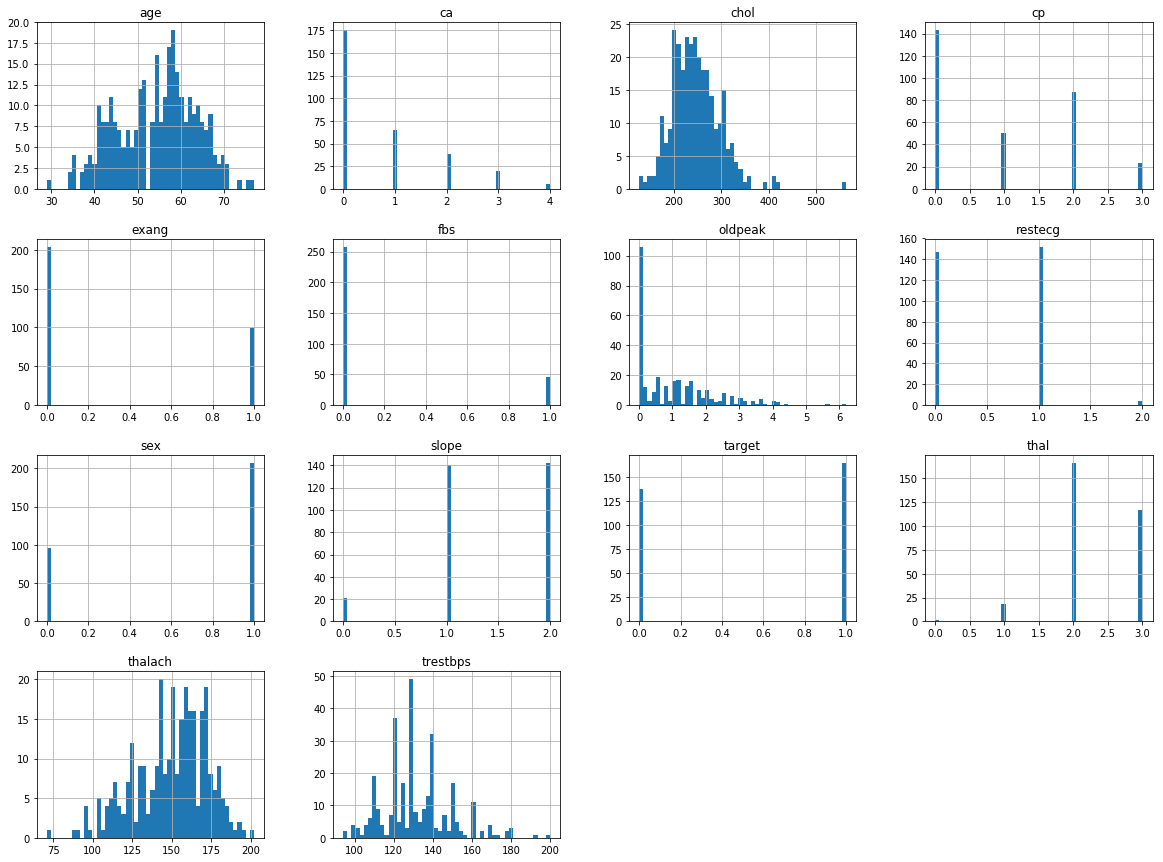

In [23]:
heart.hist(bins=50, figsize=(20,15))

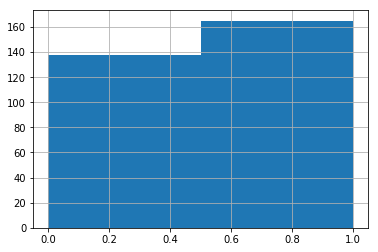

In [25]:
# See how many has heart disease and how many does not. 
heart.target.value_counts()
target = heart["target"]
target.hist(bins=2)

In [24]:
# Looking for correlation
corr_matrix = heart.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Based on the above correlation, investigate correlated features further. 

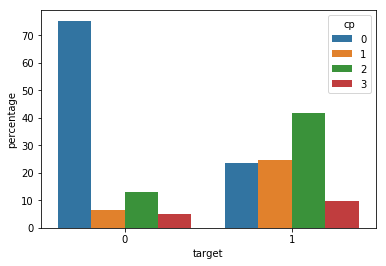

In [45]:
# For cp
temp = (heart.groupby('target'))['cp'].value_counts(normalize = True).mul(100).reset_index(name = "percentage")
sns.barplot(x = 'target', y= 'percentage', hue = 'cp',data=temp)

Chest pain type 2 is the most common amongst patients with heart disease. 

In [55]:
# For max heart rate, find the mean. 

max_heart_rate_mean = (heart.groupby("target"))["thalach"].mean()
max_heart_rate_mean

target
0    139.101449
1    158.466667
Name: thalach, dtype: float64

Taking the average, people with heart disease reached a higher max heart rate than those without heart disease. 

In [57]:
slope_mean = (heart.groupby("target"))["slope"].mean()
slope_mean

target
0    1.166667
1    1.593939
Name: slope, dtype: float64

Mean of slope of ST segment during peak exercise was higher for people with heart disease.

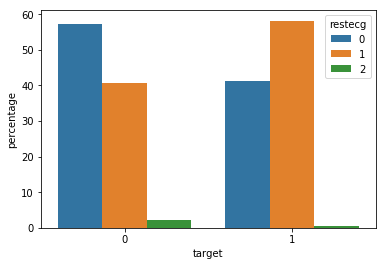

In [59]:
rest_ecg = (heart.groupby("target"))["restecg"].value_counts(normalize=True).mul(100).reset_index(name="percentage")
sns.barplot(x ="target",y="percentage",hue="restecg", data= rest_ecg)

Rest Ecg of Type 1 is more prevalent in heart disease patients. Substantial number of type 0 as well. 

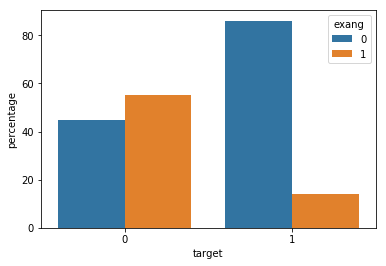

In [61]:
exang = (heart.groupby("target"))["exang"].value_counts(normalize=True).mul(100).reset_index(name="percentage")
sns.barplot(x ="target",y="percentage",hue="exang", data= exang)

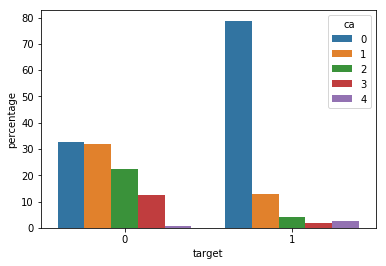

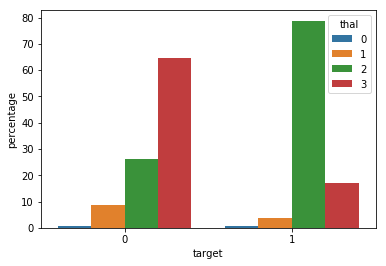

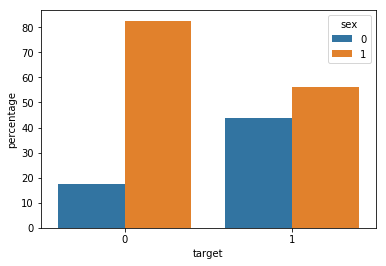

In [66]:
# Loop to speed things up
x = [ "ca", "thal", "sex"]
for i in x:
    plot = (heart.groupby("target"))[i].value_counts(normalize=True).mul(100).reset_index(name="percentage");
    plt.figure();
    sns.barplot(x ="target",y="percentage",hue= i, data= plot);


Summary!!!

thal: Type 2 for thal is high in heart disease patients, while type 3 is high in non diseased patients. 
ca: Type 0 for ca is high for heart disease patients. 
restecg: Rest Ecg of Type 1 is more prevalent in heart disease patients. Substantial number of type 0 as well. 
slope: Mean of slope of ST segment during peak exercise was higher for people with heart disease.
thalach: Taking the average, people with heart disease reached a higher max heart rate than those without heart disease. 
cp: Chest pain type 2 is the most common amongst patients with heart disease. 